In [5]:
# Importing libraries to collect and import data:
import json 
import requests 
import pickle

# Importing libraries to work with/explore data:
import pandas as pd
import numpy as np
import datetime, time
from sklearn import preprocessing

# Importing libraries to create visualizations:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# import folium
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
# import itertools
import warnings
warnings.filterwarnings('ignore')


In [6]:
def get_keys(path):
    with open(path) as f:
        return json.load(f)

In [7]:
api_key = 'dEteXwTTdqTK9nL-Eq58UXal6ATc5oXwTpMpYWi-1KbafaVz_s7k-_R-XnH4HnCbEANZf8O0C5pY4rHdXRxCZiwgUEuBkbhtNvnOYH4mmHGU-x_XpFPDEsH-seFtYnYx'

In [8]:
url = 'https://api.yelp.com/v3/businesses/search'

In [9]:
headers = {'Authorization': 'Bearer {}'.format(api_key)}

In [10]:
boroughs = ['Brooklyn', 'Manhattan', 'Queens', 'Bronx', 'Staten Island']

In [11]:
nyc_restaurants = [[] for i in range(len(boroughs))] 

In [12]:
# Function to draw in data for each neighborhood:
for x in range(len(boroughs)):
    print('---------------------------------------------')
    print('Gathering Data for {}'.format(boroughs[x]))
    print('---------------------------------------------')


    for y in range(20):
        location = boroughs[x]+', NY'
        term = "Restaurants"
        search_limit = 50
        offset = 50 * y
        categories = "(restaurants, All)"
        sort_by = 'distance'

        url_params = {
                        'location': location.replace(' ', '+'),
                        'term' : term,
                        'limit': search_limit,
                        'offset': offset,
                        'categories': categories,
                        'sorty_by': sort_by
                    }
        
        response = requests.get(url, headers=headers, params=url_params)
        print('***** {} Restaurants #{} - #{} ....{}'.format(boroughs[x], 
                                                             offset+1, offset+search_limit,
                                                             response))
        nyc_restaurants[x].append(response)

print(response)
print(type(response.text))
print(response.json().keys())
print(response.text[:1000])

---------------------------------------------
Gathering Data for Brooklyn
---------------------------------------------
***** Brooklyn Restaurants #1 - #50 ....<Response [200]>
***** Brooklyn Restaurants #51 - #100 ....<Response [200]>
***** Brooklyn Restaurants #101 - #150 ....<Response [200]>
***** Brooklyn Restaurants #151 - #200 ....<Response [200]>
***** Brooklyn Restaurants #201 - #250 ....<Response [200]>
***** Brooklyn Restaurants #251 - #300 ....<Response [200]>
***** Brooklyn Restaurants #301 - #350 ....<Response [200]>
***** Brooklyn Restaurants #351 - #400 ....<Response [200]>
***** Brooklyn Restaurants #401 - #450 ....<Response [200]>
***** Brooklyn Restaurants #451 - #500 ....<Response [200]>
***** Brooklyn Restaurants #501 - #550 ....<Response [200]>
***** Brooklyn Restaurants #551 - #600 ....<Response [200]>
***** Brooklyn Restaurants #601 - #650 ....<Response [200]>
***** Brooklyn Restaurants #651 - #700 ....<Response [200]>
***** Brooklyn Restaurants #701 - #750 ....<

In [13]:
# location = boroughs[0]+', NY'

# term = "Restaurants"
# search_limit = 50
# categories = "(restaurants, All)"
# sort_by = 'distance'

In [14]:
# url_params = {
#             'location': location.replace(' ', '+'),
#             'term' : term,
#             'limit': search_limit,
#             # 'offset': offset,
#             'categories': categories,
#             'sorty_by': sort_by
#         }

In [15]:
# response = requests.get(url, headers=headers, params=url_params)
# print(response.json().keys())

# for b in response.json()['businesses']:
#     print(b['name'], b['location']['city'])

In [16]:
resp = nyc_restaurants[0][18]

In [17]:
print(resp.json().keys())
print(resp.json()['total'])

dict_keys(['businesses', 'total', 'region'])
15600


In [18]:
# Check for any empty business lists:
for x in range(len(boroughs)):
    for y in range(20):
        num = len(nyc_restaurants[x][y].json()['businesses'])
        if num != 50:
            print(boroughs[x], y, num)

In [19]:
# Save the compiled data into dataframe and remove any empty data:
df = pd.DataFrame()
for x in range(len(nyc_restaurants)):
    if x == 6: # Little Italy has a total of 486 restaurants
        for y in range(10):
            df_temp = pd.DataFrame.from_dict(nyc_restaurants[x][y].json()['businesses'])
            df_temp.loc[:,'borough'] = boroughs[x]
            df = df.append(df_temp)
    if x == 13: # Stuyvesant Town has a total of 417 restaurants
        for y in range(10):
            df_temp = pd.DataFrame.from_dict(nyc_restaurants[x][y].json()['businesses'])
            df_temp.loc[:,'borough'] = boroughs[x]
            df = df.append(df_temp)

    else:
        for y in range(20):
            df_temp = pd.DataFrame.from_dict(nyc_restaurants[x][y].json()['businesses'])
            df_temp.loc[:,'borough'] = boroughs[x]
            df = df.append(df_temp)

In [20]:
#Save Dataset: (data pulled 4/30/22)
with open ('data.pickle','wb') as f:
    pickle.dump(df, f)


In [21]:
# Import Data:
with open ('data.pickle','rb') as f:
    df = pickle.load(f)

print(len(df))
df.head()

5000


,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,price,location,phone,display_phone,distance,borough
0,Pn5B8A4P23d5_FE6y8A2wA,mama-fox-brooklyn,Mama Fox,https://s3-media1.fl.yelpcdn.com/bphoto/LdxNQt...,False,https://www.yelp.com/biz/mama-fox-brooklyn?adj...,143,"[{'alias': 'newamerican', 'title': 'American (...",4.0,"{'latitude': 40.6832286325504, 'longitude': -7...","[pickup, delivery]",$$,"{'address1': '327 Stuyvesant Ave', 'address2':...",+13476634535,(347) 663-4535,3491.687952,Brooklyn
1,fHHpSKT9u7PQBYaMW5cEkA,trad-room-brooklyn-2,Trad Room,https://s3-media1.fl.yelpcdn.com/bphoto/ItWEFx...,False,https://www.yelp.com/biz/trad-room-brooklyn-2?...,85,"[{'alias': 'japanese', 'title': 'Japanese'}, {...",4.5,"{'latitude': 40.68391, 'longitude': -73.929419}","[pickup, delivery]",$$,"{'address1': '266 Malcolm X Blvd', 'address2':...",+13472405760,(347) 240-5760,3610.253858,Brooklyn
2,mhrLDFTxUzW2koRAzjlt5g,chavelas-brooklyn-2,Chavela's,https://s3-media4.fl.yelpcdn.com/bphoto/dIXaiL...,False,https://www.yelp.com/biz/chavelas-brooklyn-2?a...,1205,"[{'alias': 'mexican', 'title': 'Mexican'}, {'a...",4.0,"{'latitude': 40.673484, 'longitude': -73.957267}","[pickup, delivery]",$$,"{'address1': '736 Franklin Ave', 'address2': N...",+17186223100,(718) 622-3100,2795.227274,Brooklyn
3,E8gpCgCVaO2hNEPTrh4n2A,the-ryerson-brooklyn,The Ryerson,https://s3-media4.fl.yelpcdn.com/bphoto/Nb9i5j...,False,https://www.yelp.com/biz/the-ryerson-brooklyn?...,107,"[{'alias': 'southern', 'title': 'Southern'}, {...",4.5,"{'latitude': 40.67527634285857, 'longitude': -...","[pickup, delivery]",NaN,"{'address1': '698 Nostrand Ave', 'address2': '...",+13474069703,(347) 406-9703,2713.280503,Brooklyn
4,DOdamkEm9JWR9s6VH_NuOQ,mayfield-brooklyn,Mayfield,https://s3-media3.fl.yelpcdn.com/bphoto/rRv0Nv...,False,https://www.yelp.com/biz/mayfield-brooklyn?adj...,571,"[{'alias': 'newamerican', 'title': 'American (...",4.0,"{'latitude': 40.674924094277564, 'longitude': ...","[pickup, delivery]",$$,"{'address1': '688 Franklin Ave', 'address2': '...",+13473183643,(347) 318-3643,2902.817603,Brooklyn


In [22]:
# Add a column that counts how many data entries have the same id (and therefore represent the same restaurant):
df['count'] = df.groupby('id')['id'].transform('count')

# Sort values by name and id:
df_sorted = df.sort_values(by=['alias', 'id'])

# Drop duplicate values:
df_filtered = df_sorted.drop_duplicates(subset=['alias', 'id'], keep='first', inplace=False).copy()

# Double check no duplicates remain:
df_filtered['count'] = df_filtered.groupby('id')['id'].transform('count')
print('Number of Restaurants ', len(df_filtered))
print('Number of duplicates: ', len(df_filtered[df_filtered['count'] > 1]))
df_filtered.reset_index(inplace=True, drop = True)
df_filtered.head()


Number of Restaurants  3825
Number of duplicates:  0


,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,price,location,phone,display_phone,distance,borough,count
0,4WWIUwwDgE4RjrmpZss3fw,111-deli-stop-corp-flushing,111 Deli Stop Corp,https://s3-media3.fl.yelpcdn.com/bphoto/3s8_5M...,False,https://www.yelp.com/biz/111-deli-stop-corp-fl...,27,"[{'alias': 'delis', 'title': 'Delis'}]",5.0,"{'latitude': 40.75817, 'longitude': -73.85907}",[],$,"{'address1': '110-21 Northern Blvd', 'address2...",+13473614276,(347) 361-4276,3012.385563,Queens,1
1,i38R1KxL99JoG-Ns7FyyGw,12-chairs-new-york,12 Chairs,https://s3-media3.fl.yelpcdn.com/bphoto/ZLCNB0...,False,https://www.yelp.com/biz/12-chairs-new-york?ad...,685,"[{'alias': 'mideastern', 'title': 'Middle East...",4.0,"{'latitude': 40.72759, 'longitude': -74.0024}","[pickup, delivery]",$$,"{'address1': '56 MacDougal St', 'address2': ''...",+12122548640,(212) 254-8640,4148.407886,Manhattan,1
2,Oy7mBz6xtCWkaeoF2l1ZKw,120-bay-cafe-staten-island,120 Bay Cafe,https://s3-media3.fl.yelpcdn.com/bphoto/bbVVn3...,False,https://www.yelp.com/biz/120-bay-cafe-staten-i...,75,"[{'alias': 'tradamerican', 'title': 'American ...",4.0,"{'latitude': 40.63946, 'longitude': -74.07576}",[],$$,"{'address1': '120 Bay St', 'address2': '', 'ad...",+17182737770,(718) 273-7770,8178.162227,Staten Island,1
3,mEi57As_Gwyt1F73V2x__A,1392-seafood-bbq-flushing,1392 Seafood BBQ,https://s3-media1.fl.yelpcdn.com/bphoto/0AMSe3...,False,https://www.yelp.com/biz/1392-seafood-bbq-flus...,71,"[{'alias': 'seafood', 'title': 'Seafood'}, {'a...",4.0,"{'latitude': 40.759217, 'longitude': -73.832547}","[delivery, pickup]",$$,"{'address1': '39-16 Prince St', 'address2': ''...",+17189391392,(718) 939-1392,3528.571250,Queens,1
4,cl-WzOB5ni-S9XvmXkvKrQ,18-wheelers-bar-and-grill-kearny,18 Wheelers Bar And Grill,https://s3-media1.fl.yelpcdn.com/bphoto/eiTgUM...,True,https://www.yelp.com/biz/18-wheelers-bar-and-g...,2,"[{'alias': 'bars', 'title': 'Bars'}, {'alias':...",4.5,"{'latitude': 40.731752351916434, 'longitude': ...",[],NaN,"{'address1': '2 Jacobus Ave', 'address2': '', ...",+19733441858,(973) 344-1858,16462.990170,Staten Island,1


In [23]:
# Remove columns that we will not be working with:
df_filtered.drop(columns = ['alias', 'distance', 'id', 'image_url', 'is_closed', 'url',
                            'count','coordinates','transactions','display_phone','distance'], inplace = True, axis = 1)
df_filtered.drop

<bound method DataFrame.drop of                            name  review_count  \
0            111 Deli Stop Corp            27   
1                     12 Chairs           685   
2                  120 Bay Cafe            75   
3              1392 Seafood BBQ            71   
4     18 Wheelers Bar And Grill             2   
...                         ...           ...   
3820  Zurutto Ramen & Gyoza Bar           443   
3821      Zymi Pizza Restaurant             4   
3822           Çakor Restaurant            13   
3823               ÇKA KA QËLLU            51   
3824    Ñaño Ecuadorian Kitchen           592   

                                             categories  rating price  \
0                [{'alias': 'delis', 'title': 'Delis'}]     5.0     $   
1     [{'alias': 'mideastern', 'title': 'Middle East...     4.0    $$   
2     [{'alias': 'tradamerican', 'title': 'American ...     4.0    $$   
3     [{'alias': 'seafood', 'title': 'Seafood'}, {'a...     4.0    $$   
4     [{'alias

In [24]:
# Extract dictionary values for the category, latitude, longitude, and location:
df_filtered['categories_clean'] = df_filtered['categories'].apply(lambda a: [x['alias'] for x in a])
df_filtered['address'] = df_filtered['location'].apply(lambda x: x.get('address1'))
df_filtered['city'] = df_filtered['location'].apply(lambda x: x.get('city'))
df_filtered['zip_code'] = df_filtered['location'].apply(lambda x: x.get('zip_code'))
df_filtered['state'] = df_filtered['location'].apply(lambda x: x.get('state'))

# Remove original categories, coordinates, and location columns:
df_filtered.drop(columns=['categories','location'], inplace = True, axis= 1 )

# Print first 5 rows to ensure the data pulled in correctly:
df_filtered.head()

,name,review_count,rating,price,phone,borough,categories_clean,address,city,zip_code,state
0,111 Deli Stop Corp,27,5.0,$,+13473614276,Queens,[delis],110-21 Northern Blvd,Flushing,11368,NY
1,12 Chairs,685,4.0,$$,+12122548640,Manhattan,"[mideastern, tradamerican, breakfast_brunch]",56 MacDougal St,New York,10012,NY
2,120 Bay Cafe,75,4.0,$$,+17182737770,Staten Island,"[tradamerican, bars]",120 Bay St,Staten Island,10301,NY
3,1392 Seafood BBQ,71,4.0,$$,+17189391392,Queens,"[seafood, bbq, chinese]",39-16 Prince St,Flushing,11354,NY
4,18 Wheelers Bar And Grill,2,4.5,NaN,+19733441858,Staten Island,"[bars, tradamerican]",2 Jacobus Ave,Kearny,07032,NJ


In [25]:
df_filtered.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3825 entries, 0 to 3824
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              3825 non-null   object 
 1   review_count      3825 non-null   int64  
 2   rating            3825 non-null   float64
 3   price             2790 non-null   object 
 4   phone             3825 non-null   object 
 5   borough           3825 non-null   object 
 6   categories_clean  3825 non-null   object 
 7   address           3819 non-null   object 
 8   city              3825 non-null   object 
 9   zip_code          3825 non-null   object 
 10  state             3825 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 328.8+ KB


In [26]:
df.columns

Index(['id', 'alias', 'name', 'image_url', 'is_closed', 'url', 'review_count',
       'categories', 'rating', 'coordinates', 'transactions', 'price',
       'location', 'phone', 'display_phone', 'distance', 'borough', 'count'],
      dtype='object')

In [27]:
# Get dummy variables for categorical columns (categories and transactions):
categories_dummy = df_filtered['categories_clean'].str.join(sep=',').str.get_dummies(sep=',')

# Combine new columns with original dataframe:
df_filtered = pd.concat([df_filtered, categories_dummy], axis=1)
df_filtered.head()

,name,review_count,rating,price,phone,borough,categories_clean,address,city,zip_code,...,vegetarian,venezuelan,venues,vietnamese,waffles,wedding_planning,whiskeybars,wine_bars,winetastingroom,wraps
0,111 Deli Stop Corp,27,5.0,$,+13473614276,Queens,[delis],110-21 Northern Blvd,Flushing,11368,...,0,0,0,0,0,0,0,0,0,0
1,12 Chairs,685,4.0,$$,+12122548640,Manhattan,"[mideastern, tradamerican, breakfast_brunch]",56 MacDougal St,New York,10012,...,0,0,0,0,0,0,0,0,0,0
2,120 Bay Cafe,75,4.0,$$,+17182737770,Staten Island,"[tradamerican, bars]",120 Bay St,Staten Island,10301,...,0,0,0,0,0,0,0,0,0,0
3,1392 Seafood BBQ,71,4.0,$$,+17189391392,Queens,"[seafood, bbq, chinese]",39-16 Prince St,Flushing,11354,...,0,0,0,0,0,0,0,0,0,0
4,18 Wheelers Bar And Grill,2,4.5,NaN,+19733441858,Staten Island,"[bars, tradamerican]",2 Jacobus Ave,Kearny,07032,...,0,0,0,0,0,0,0,0,0,0


In [28]:
# Add in number of categories:
df_filtered['num_of_cat'] = df_filtered['categories_clean'].apply(lambda x: len(x))

# Find the most frequent categories (anything with over 150 entries):
all_category = pd.DataFrame(categories_dummy.sum().sort_values(ascending=False))
category = list(all_category[all_category[0] > 150].index)

# Identify each restaurant as either being a mainstream or a rare category:
df_filtered['mainstream_category'] = np.sum(df_filtered[category], axis = 1)
df_filtered['rare_category'] = 0
df_filtered.loc[df_filtered['mainstream_category'] == 0, 'rare_category'] = 1
df_filtered.loc[df_filtered['mainstream_category'] != 0, 'mainstream_category'] = 1

# Check that new columns show up correctly:
df_filtered.head()

,name,review_count,rating,price,phone,borough,categories_clean,address,city,zip_code,...,vietnamese,waffles,wedding_planning,whiskeybars,wine_bars,winetastingroom,wraps,num_of_cat,mainstream_category,rare_category
0,111 Deli Stop Corp,27,5.0,$,+13473614276,Queens,[delis],110-21 Northern Blvd,Flushing,11368,...,0,0,0,0,0,0,0,1,0,1
1,12 Chairs,685,4.0,$$,+12122548640,Manhattan,"[mideastern, tradamerican, breakfast_brunch]",56 MacDougal St,New York,10012,...,0,0,0,0,0,0,0,3,1,0
2,120 Bay Cafe,75,4.0,$$,+17182737770,Staten Island,"[tradamerican, bars]",120 Bay St,Staten Island,10301,...,0,0,0,0,0,0,0,2,1,0
3,1392 Seafood BBQ,71,4.0,$$,+17189391392,Queens,"[seafood, bbq, chinese]",39-16 Prince St,Flushing,11354,...,0,0,0,0,0,0,0,3,1,0
4,18 Wheelers Bar And Grill,2,4.5,NaN,+19733441858,Staten Island,"[bars, tradamerican]",2 Jacobus Ave,Kearny,07032,...,0,0,0,0,0,0,0,2,1,0


In [29]:
# Check if we have any null values:
df_filtered.isnull().sum()

name                      0
review_count              0
rating                    0
price                  1035
phone                     0
                       ... 
winetastingroom           0
wraps                     0
num_of_cat                0
mainstream_category       0
rare_category             0
Length: 231, dtype: int64

In [30]:
# Replace null values in the price column with 'zero'
df_filtered['price'].fillna(value='N/A', inplace=True)

# Update price to be numerical values:
price = {'$': 1, '$$': 2, '$$$':3, '$$$$': 4, 'N/A': 0}
df_filtered['price_value'] = df_filtered['price'].map(price)

# Remove null values from latitude, longitude, and address columns:
df_filtered.dropna(inplace=True)
df_filtered.head()

,name,review_count,rating,price,phone,borough,categories_clean,address,city,zip_code,...,waffles,wedding_planning,whiskeybars,wine_bars,winetastingroom,wraps,num_of_cat,mainstream_category,rare_category,price_value
0,111 Deli Stop Corp,27,5.0,$,+13473614276,Queens,[delis],110-21 Northern Blvd,Flushing,11368,...,0,0,0,0,0,0,1,0,1,1
1,12 Chairs,685,4.0,$$,+12122548640,Manhattan,"[mideastern, tradamerican, breakfast_brunch]",56 MacDougal St,New York,10012,...,0,0,0,0,0,0,3,1,0,2
2,120 Bay Cafe,75,4.0,$$,+17182737770,Staten Island,"[tradamerican, bars]",120 Bay St,Staten Island,10301,...,0,0,0,0,0,0,2,1,0,2
3,1392 Seafood BBQ,71,4.0,$$,+17189391392,Queens,"[seafood, bbq, chinese]",39-16 Prince St,Flushing,11354,...,0,0,0,0,0,0,3,1,0,2
4,18 Wheelers Bar And Grill,2,4.5,N/A,+19733441858,Staten Island,"[bars, tradamerican]",2 Jacobus Ave,Kearny,07032,...,0,0,0,0,0,0,2,1,0,0


In [31]:
# Check for outliers:
df_filtered.describe()

,review_count,rating,acaibowls,afghani,african,arabian,arcades,argentine,asianfusion,australian,...,waffles,wedding_planning,whiskeybars,wine_bars,winetastingroom,wraps,num_of_cat,mainstream_category,rare_category,price_value
count,3819.000000,3819.000000,3819.000000,3819.000000,3819.000000,3819.000000,3819.000000,3819.000000,3819.000000,3819.000000,...,3819.000000,3819.000000,3819.000000,3819.000000,3819.000000,3819.000000,3819.000000,3819.000000,3819.000000,3819.000000
mean,317.411102,4.163263,0.000524,0.000524,0.004713,0.000262,0.000262,0.002357,0.025137,0.002095,...,0.001833,0.000262,0.002357,0.045562,0.000262,0.002357,2.182770,0.687876,0.312124,1.477350
std,628.507835,0.468901,0.022881,0.022881,0.068500,0.016182,0.016182,0.048494,0.156563,0.045727,...,0.042779,0.016182,0.048494,0.208560,0.016182,0.048494,0.835066,0.463421,0.463421,1.023146
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,36.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,127.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,2.000000
75%,340.500000,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,1.000000,2.000000
max,13505.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,4.000000


In [32]:
# Replace outlier values in the review_count column (anything above 1500) with the number 1500:
df_filtered['review_count'] = np.where(df_filtered['review_count'].between(1500,12340), 1500,
                                       df_filtered['review_count'])

df_filtered.describe()

,review_count,rating,acaibowls,afghani,african,arabian,arcades,argentine,asianfusion,australian,...,waffles,wedding_planning,whiskeybars,wine_bars,winetastingroom,wraps,num_of_cat,mainstream_category,rare_category,price_value
count,3819.000000,3819.000000,3819.000000,3819.000000,3819.000000,3819.000000,3819.000000,3819.000000,3819.000000,3819.000000,...,3819.000000,3819.000000,3819.000000,3819.000000,3819.000000,3819.000000,3819.000000,3819.000000,3819.000000,3819.000000
mean,276.727939,4.163263,0.000524,0.000524,0.004713,0.000262,0.000262,0.002357,0.025137,0.002095,...,0.001833,0.000262,0.002357,0.045562,0.000262,0.002357,2.182770,0.687876,0.312124,1.477350
std,423.369399,0.468901,0.022881,0.022881,0.068500,0.016182,0.016182,0.048494,0.156563,0.045727,...,0.042779,0.016182,0.048494,0.208560,0.016182,0.048494,0.835066,0.463421,0.463421,1.023146
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,36.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,127.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,2.000000
75%,340.500000,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,1.000000,2.000000
max,13505.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,4.000000


In [33]:
df_inspec = pd.read_csv('/Users/sreejasriramaneni/Downloads/DV restaurant data.csv')
df_inspec.head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,...,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,41510938,AFTER 8,Queens,2587,STEINWAY STREET,11103.0,7187775757,American,03/25/2022,Violations were cited in the following area(s).,...,04/30/2022,Smoke-Free Air Act / Initial Inspection,40.767510,-73.912032,401.0,22.0,14300.0,4000000.0,4.006840e+09,QN70
1,41692932,GOURMET 45,Manhattan,721,3 AVENUE,10017.0,2126826220,Sandwiches,09/26/2019,Violations were cited in the following area(s).,...,04/30/2022,Cycle Inspection / Re-inspection,40.752776,-73.972966,106.0,4.0,9000.0,1037582.0,1.013190e+09,MN19
2,50095624,AVENUE CAFE,Queens,3527,30TH AVE,11103.0,7184339298,Mediterranean,08/28/2019,No violations were recorded at the time of thi...,...,04/30/2022,Pre-permit (Operational) / Re-inspection,40.765269,-73.917916,401.0,22.0,6502.0,4009223.0,4.006290e+09,QN70
3,50054381,JUPIOCA,Brooklyn,278B,WYCKOFF AVE,11237.0,9179826111,"Juice, Smoothies, Fruit Salads",02/05/19,Violations were cited in the following area(s).,...,04/30/2022,Cycle Inspection / Initial Inspection,40.700019,-73.911988,304.0,37.0,43900.0,NaN,3.000000e+00,BK77
4,50054381,JUPIOCA,Brooklyn,278B,WYCKOFF AVE,11237.0,9179826111,"Juice, Smoothies, Fruit Salads",02/05/19,Violations were cited in the following area(s).,...,04/30/2022,Cycle Inspection / Initial Inspection,40.700019,-73.911988,304.0,37.0,43900.0,NaN,3.000000e+00,BK77


In [34]:
df_inspec.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301744 entries, 0 to 301743
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   CAMIS                  301744 non-null  int64  
 1   DBA                    300349 non-null  object 
 2   BORO                   301744 non-null  object 
 3   BUILDING               301254 non-null  object 
 4   STREET                 301724 non-null  object 
 5   ZIPCODE                297420 non-null  float64
 6   PHONE                  301716 non-null  object 
 7   CUISINE DESCRIPTION    297682 non-null  object 
 8   INSPECTION DATE        301744 non-null  object 
 9   ACTION                 297682 non-null  object 
 10  VIOLATION CODE         294482 non-null  object 
 11  VIOLATION DESCRIPTION  296213 non-null  object 
 12  CRITICAL FLAG          301744 non-null  object 
 13  SCORE                  287604 non-null  float64
 14  GRADE                  150885 non-nu

In [35]:
#Change the inspection date column to datetime format:
df_inspec['INSPECTION DATE'] = pd.to_datetime(df_inspec['INSPECTION DATE'])

# Add a column that counts how many data entries have the same id (CAMIS) (and therefore represent the same restaurant):
df_inspec['#_of_inspections'] = df_inspec.groupby('CAMIS')['CAMIS'].transform('count')

# Sort values by name (DBA), id (CAMIS), and inspection date:
df_inspec_sorted = df_inspec.sort_values(by=['DBA', 'CAMIS','INSPECTION DATE'])

# Drop duplicate values:
df_inspec_filtered = df_inspec_sorted.drop_duplicates(subset=['DBA', 'CAMIS'], keep='last', inplace=False).copy()

# Double check no duplicates remain:
df_inspec_filtered['count_check'] = df_inspec_filtered.groupby('CAMIS')['CAMIS'].transform('count')
print('# of Restaurants in NYC: ', len(df_inspec_filtered))
print('# of duplicates: ', len(df_inspec_filtered[df_inspec_filtered['count_check'] > 1]))
df_inspec_filtered.reset_index(inplace=True, drop = True)
df_inspec_filtered.head()

# of Restaurants in NYC:  28494
# of duplicates:  0


,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,...,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,#_of_inspections,count_check
0,50075009,#1 GARDEN CHINESE RESTAURANT,Brooklyn,221,PROSPECT PARK WEST,11215.0,9172508950,Chinese,2019-12-16,Violations were cited in the following area(s).,...,40.660156,-73.980555,307.0,39.0,16900.0,3026939.0,3.011100e+09,BK40,29,1
1,41336841,#1 SABOR LATINO RESTAURANT,Bronx,4120,WHITE PLAINS ROAD,10466.0,7186532222,Latin American,2022-03-17,Violations were cited in the following area(s).,...,40.891176,-73.858591,212.0,12.0,42200.0,2063603.0,2.048430e+09,BX44,15,1
2,50086385,$1 PIZZA,Manhattan,832,6 AVENUE,10001.0,9175878888,Pizza,2022-02-22,Violations were cited in the following area(s).,...,40.746510,-73.990158,105.0,3.0,7600.0,1015746.0,1.008300e+09,MN17,12,1
3,50105915,$1 PIZZA SLICE,Manhattan,748,9 AVENUE,10019.0,5513581106,Pizza,2022-03-30,Violations were cited in the following area(s).,...,40.763714,-73.988766,104.0,3.0,13300.0,1025172.0,1.010410e+09,MN15,3,1
4,50106018,$1 SLICE PIZZA,Bronx,3414,JEROME AVENUE,10467.0,3479930599,Pizza,2021-11-18,Violations were cited in the following area(s).,...,40.881253,-73.882900,207.0,11.0,42100.0,2017769.0,2.033270e+09,BX43,3,1


In [36]:
# Remove columns that we will not be working with:
df_inspec_filtered.drop(columns = ['VIOLATION CODE', 'VIOLATION DESCRIPTION', 'RECORD DATE', 
                                   'Community Board', 'Council District', 'Census Tract','BIN','BBL','NTA',
                                   'count_check','Latitude','Longitude'], inplace = True, axis=1)

In [37]:
# Update format of telephone numbers:
#df_inspec_filtered['PHONE']=df_inspec_filtered['PHONE'].astype(str).apply(
    #lambda x: '('+x[:3]+')'+' '+x[3:6]+'-'+x[6:10])


df_inspec_filtered['PHONE'] = df_inspec_filtered['PHONE'].astype(str).radd("+1").str[-12:]
# Rename telephone number column to match the name in the df_filtered dataset:
df_inspec_filtered.rename(columns={'PHONE':'phone'}, inplace=True)
df_inspec_filtered.head()



,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,phone,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,INSPECTION TYPE,#_of_inspections
0,50075009,#1 GARDEN CHINESE RESTAURANT,Brooklyn,221,PROSPECT PARK WEST,11215.0,+19172508950,Chinese,2019-12-16,Violations were cited in the following area(s).,Critical,10.0,A,12/16/2019,Cycle Inspection / Re-inspection,29
1,41336841,#1 SABOR LATINO RESTAURANT,Bronx,4120,WHITE PLAINS ROAD,10466.0,+17186532222,Latin American,2022-03-17,Violations were cited in the following area(s).,Critical,40.0,NaN,NaN,Cycle Inspection / Initial Inspection,15
2,50086385,$1 PIZZA,Manhattan,832,6 AVENUE,10001.0,+19175878888,Pizza,2022-02-22,Violations were cited in the following area(s).,Critical,7.0,B,02/22/2022,Cycle Inspection / Re-inspection,12
3,50105915,$1 PIZZA SLICE,Manhattan,748,9 AVENUE,10019.0,+15513581106,Pizza,2022-03-30,Violations were cited in the following area(s).,Critical,23.0,N,NaN,Cycle Inspection / Initial Inspection,3
4,50106018,$1 SLICE PIZZA,Bronx,3414,JEROME AVENUE,10467.0,+13479930599,Pizza,2021-11-18,Violations were cited in the following area(s).,Critical,11.0,A,11/18/2021,Pre-permit (Operational) / Initial Inspection,3


In [38]:
df_inspec_filtered.isnull().sum()

CAMIS                     0
DBA                    1344
BORO                      0
BUILDING                 99
STREET                   20
ZIPCODE                 471
phone                     0
CUISINE DESCRIPTION    4062
INSPECTION DATE           0
ACTION                 4062
CRITICAL FLAG             0
SCORE                  4641
GRADE                  8164
GRADE DATE             9348
INSPECTION TYPE        4062
#_of_inspections          0
dtype: int64

In [39]:
# Replace null values in ACTION column with 'Not Yet Inspected' as per guidence from dataset creators
df_inspec_filtered['ACTION'].fillna(value='Not Yet Inspected', inplace=True)

# Replace null values in CRITICAL FLAG column with 'Not Applicable' as per guidence from dataset creators
df_inspec_filtered['CRITICAL FLAG'].fillna(value='Not Applicable', inplace=True)

# Replace null values in INSPECTION TYPE column with 'Unknown' as per guidence from dataset creators
df_inspec_filtered['INSPECTION TYPE'].fillna(value='Unknown', inplace=True)
df_inspec_filtered.isnull().sum()

CAMIS                     0
DBA                    1344
BORO                      0
BUILDING                 99
STREET                   20
ZIPCODE                 471
phone                     0
CUISINE DESCRIPTION    4062
INSPECTION DATE           0
ACTION                    0
CRITICAL FLAG             0
SCORE                  4641
GRADE                  8164
GRADE DATE             9348
INSPECTION TYPE           0
#_of_inspections          0
dtype: int64

In [40]:
# Use details from Action column to determine grade status for rows with null values:
df_inspec_filtered['GRADE'].fillna(df_inspec_filtered['ACTION'], inplace=True)
df_inspec_filtered['GRADE'].replace({'Violations were cited in the following area(s).':'Z',
                                     'No violations were recorded at the time of this inspection.': 'A',
                                     'Not Yet Inspected':'N',
                                     'Establishment Closed by DOHMH.  Violations were cited in the following area(s) and those requiring immediate action were addressed.':'P',
                                     'Establishment re-opened by DOHMH': 'P','Establishment re-closed by DOHMH': 'P'}, inplace = True)

# Ensure GRADE column has only the grade letter scores and not any text from the Action column:
df_inspec_filtered['GRADE'].value_counts()

A                                                                                                                                     17435
N                                                                                                                                      5250
Z                                                                                                                                      4595
B                                                                                                                                       917
C                                                                                                                                       232
Establishment Closed by DOHMH. Violations were cited in the following area(s) and those requiring immediate action were addressed.       36
Establishment re-opened by DOHMH.                                                                                                        29
Name: GRADE, dtype: 

In [41]:
# Use details from GRADE column to determine the SCORE for rows with null values:
df_inspec_filtered['SCORE'].fillna(df_inspec_filtered['GRADE'], inplace=True)
df_inspec_filtered['SCORE'].replace({'N':'PEND',
                                     'Z': 'PEND',
                                     'P':'PEND',
                                     'A': 8,
                                     'B': 21,
                                     'C': 35}, inplace = True)


In [42]:
# Replace null values in grade date column with 'TBD' as the restaurants with no grade date do not yet have a grade.
df_inspec_filtered['GRADE DATE'].fillna(value='TBD', inplace=True)

# Drop all other rows with NaN values:
df_inspec_filtered.dropna(inplace=True)

# Double check we do not have any more null values:
df_inspec_filtered.isnull().sum()

CAMIS                  0
DBA                    0
BORO                   0
BUILDING               0
STREET                 0
ZIPCODE                0
phone                  0
CUISINE DESCRIPTION    0
INSPECTION DATE        0
ACTION                 0
CRITICAL FLAG          0
SCORE                  0
GRADE                  0
GRADE DATE             0
INSPECTION TYPE        0
#_of_inspections       0
dtype: int64

In [43]:
# Check For Outliers:
df_inspec_filtered.describe()


,CAMIS,ZIPCODE,#_of_inspections
count,2.397900e+04,23979.000000,23979.000000
mean,4.716141e+07,10676.890863,12.216273
std,4.173449e+06,593.860912,9.991456
min,3.007544e+07,10000.000000,1.000000
25%,4.157864e+07,10022.000000,5.000000
50%,5.004726e+07,10468.000000,9.000000
75%,5.008767e+07,11228.000000,17.000000
max,5.012157e+07,12345.000000,99.000000


In [44]:
# Convert outliers in number of inspections column to have a value of '70'
df_inspec_filtered['#_of_inspections'] = np.where(df_inspec_filtered['#_of_inspections'].between(
    70,98), 70, df_inspec_filtered['#_of_inspections'])

In [45]:
df_inspec_filtered.describe()
df_inspec_filtered.head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,phone,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,INSPECTION TYPE,#_of_inspections
0,50075009,#1 GARDEN CHINESE RESTAURANT,Brooklyn,221,PROSPECT PARK WEST,11215.0,+19172508950,Chinese,2019-12-16,Violations were cited in the following area(s).,Critical,10.0,A,12/16/2019,Cycle Inspection / Re-inspection,29
1,41336841,#1 SABOR LATINO RESTAURANT,Bronx,4120,WHITE PLAINS ROAD,10466.0,+17186532222,Latin American,2022-03-17,Violations were cited in the following area(s).,Critical,40.0,Z,TBD,Cycle Inspection / Initial Inspection,15
2,50086385,$1 PIZZA,Manhattan,832,6 AVENUE,10001.0,+19175878888,Pizza,2022-02-22,Violations were cited in the following area(s).,Critical,7.0,B,02/22/2022,Cycle Inspection / Re-inspection,12
3,50105915,$1 PIZZA SLICE,Manhattan,748,9 AVENUE,10019.0,+15513581106,Pizza,2022-03-30,Violations were cited in the following area(s).,Critical,23.0,N,TBD,Cycle Inspection / Initial Inspection,3
4,50106018,$1 SLICE PIZZA,Bronx,3414,JEROME AVENUE,10467.0,+13479930599,Pizza,2021-11-18,Violations were cited in the following area(s).,Critical,11.0,A,11/18/2021,Pre-permit (Operational) / Initial Inspection,3


In [46]:
df_inspec_filtered.head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,phone,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,INSPECTION TYPE,#_of_inspections
0,50075009,#1 GARDEN CHINESE RESTAURANT,Brooklyn,221,PROSPECT PARK WEST,11215.0,+19172508950,Chinese,2019-12-16,Violations were cited in the following area(s).,Critical,10.0,A,12/16/2019,Cycle Inspection / Re-inspection,29
1,41336841,#1 SABOR LATINO RESTAURANT,Bronx,4120,WHITE PLAINS ROAD,10466.0,+17186532222,Latin American,2022-03-17,Violations were cited in the following area(s).,Critical,40.0,Z,TBD,Cycle Inspection / Initial Inspection,15
2,50086385,$1 PIZZA,Manhattan,832,6 AVENUE,10001.0,+19175878888,Pizza,2022-02-22,Violations were cited in the following area(s).,Critical,7.0,B,02/22/2022,Cycle Inspection / Re-inspection,12
3,50105915,$1 PIZZA SLICE,Manhattan,748,9 AVENUE,10019.0,+15513581106,Pizza,2022-03-30,Violations were cited in the following area(s).,Critical,23.0,N,TBD,Cycle Inspection / Initial Inspection,3
4,50106018,$1 SLICE PIZZA,Bronx,3414,JEROME AVENUE,10467.0,+13479930599,Pizza,2021-11-18,Violations were cited in the following area(s).,Critical,11.0,A,11/18/2021,Pre-permit (Operational) / Initial Inspection,3


In [47]:
df_filtered.head()

,name,review_count,rating,price,phone,borough,categories_clean,address,city,zip_code,...,waffles,wedding_planning,whiskeybars,wine_bars,winetastingroom,wraps,num_of_cat,mainstream_category,rare_category,price_value
0,111 Deli Stop Corp,27,5.0,$,+13473614276,Queens,[delis],110-21 Northern Blvd,Flushing,11368,...,0,0,0,0,0,0,1,0,1,1
1,12 Chairs,685,4.0,$$,+12122548640,Manhattan,"[mideastern, tradamerican, breakfast_brunch]",56 MacDougal St,New York,10012,...,0,0,0,0,0,0,3,1,0,2
2,120 Bay Cafe,75,4.0,$$,+17182737770,Staten Island,"[tradamerican, bars]",120 Bay St,Staten Island,10301,...,0,0,0,0,0,0,2,1,0,2
3,1392 Seafood BBQ,71,4.0,$$,+17189391392,Queens,"[seafood, bbq, chinese]",39-16 Prince St,Flushing,11354,...,0,0,0,0,0,0,3,1,0,2
4,18 Wheelers Bar And Grill,2,4.5,N/A,+19733441858,Staten Island,"[bars, tradamerican]",2 Jacobus Ave,Kearny,07032,...,0,0,0,0,0,0,2,1,0,0


In [48]:
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

In [49]:
# Merge our 2 datasets using the restaurant's phone number:
df_merged = pd.merge(df_inspec_filtered, df_filtered, on=("phone"))

df_merged.head()


,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,phone,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,INSPECTION TYPE,#_of_inspections,name,review_count,rating,price,borough,categories_clean,address,city,zip_code,state,acaibowls,afghani,african,arabian,arcades,argentine,asianfusion,australian,austrian,bagels,bakeries,bangladeshi,bars,basque,bbq,beer_and_wine,beerbar,beergardens,belgian,boating,bookstores,brasseries,brazilian,breakfast_brunch,breweries,british,bubbletea,buffets,burgers,burmese,butcher,cafes,cafeteria,cajun,cakeshop,cambodian,cantonese,caribbean,catering,cheese,cheesesteaks,chicken_wings,chickenshop,chinese,chocolate,cocktailbars,coffee,coffeeroasteries,colombian,comfortfood,conveyorsushi,cookingclasses,creperies,cuban,cupcakes,customcakes,czech,danceclubs,delis,desserts,dimsum,diners,dinnertheater,divebars,dominican,donuts,eatertainment,egyptian,empanadas,eritrean,ethiopian,eventplanning,falafel,festivals,filipino,fishnchips,fondue,food,food_court,fooddeliveryservices,foodstands,foodtrucks,french,gardening,gastropubs,gelato,georgian,german,gluten_free,gourmet,greek,grocery,hainan,haitian,halal,hawaiian,himalayan,hkcafe,homedecor,honduran,hotdog,hotdogs,hotpot,hungarian,icecream,importedfood,indonesian,indpak,intlgrocery,irish,irish_pubs,italian,izakaya,japacurry,japanese,jazzandblues,juicebars,karaoke,kebab,korean,kosher,laotian,latin,lebanese,lounges,macarons,malaysian,meats,mediterranean,mexican,mideastern,modern_european,moroccan,movietheaters,musicvenues,newamerican,newmexican,nightlife,noodles,pakistani,panasian,pancakes,pastashops,persian,peruvian,pianobars,pizza,poke,polish,poolhalls,popuprestaurants,popupshops,portuguese,poutineries,pretzels,pubs,puertorican,ramen,raw_food,resorts,restaurants,russian,salad,salvadoran,sandwiches,scandinavian,seafood,seafoodmarkets,senegalese,shanghainese,sicilian,singaporean,slovakian,smokehouse,somali,soulfood,soup,southern,spanish,speakeasies,sports_clubs,sportsbars,srilankan,steak,streetvendors,supperclubs,sushi,syrian,szechuan,tacos,taiwanese,tapas,tapasmallplates,tea,teppanyaki,tex-mex,thai,theater,themedcafes,tikibars,tradamerican,trinidadian,turkish,tuscan,ukrainian,uzbek,vegan,vegetarian,venezuelan,venues,vietnamese,waffles,wedding_planning,whiskeybars,wine_bars,winetastingroom,wraps,num_of_cat,mainstream_category,rare_category,price_value
0,40804423,(LEWIS DRUG STORE) LOCANDA VINI E OLII,Brooklyn,129,GATES AVENUE,11238.0,+17186229202,Italian,2022-03-11,Violations were cited in the following area(s).,Critical,26.0,Z,TBD,Cycle Inspection / Initial Inspection,6,Locanda Vini e Olii,324,4.0,$$$,Brooklyn,"[italian, wine_bars]",129 Gates Ave,Brooklyn,11238,NY,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,1,0,3
1,41092609,10TH AVENUE COOKSHOP,Manhattan,156,10 AVENUE,10011.0,+12129244440,American,2022-04-11,Violations were cited in the following area(s).,Not Critical,8.0,A,04/11/22,Cycle Inspection / Initial Inspection,2,Cookshop,1500,4.0,$$,Manhattan,"[newamerican, breakfast_brunch, wine_bars]",156 10th Ave,New York,10011,NY,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3,1,0,2
2,41646201,120 BAY CAFE,Staten Island,120,BAY STREET,10301.0,+17182737770,American,2019-06-17,Violations we

In [50]:
df_merged.columns

Index(['CAMIS', 'DBA', 'BORO', 'BUILDING', 'STREET', 'ZIPCODE', 'phone',
       'CUISINE DESCRIPTION', 'INSPECTION DATE', 'ACTION',
       ...
       'waffles', 'wedding_planning', 'whiskeybars', 'wine_bars',
       'winetastingroom', 'wraps', 'num_of_cat', 'mainstream_category',
       'rare_category', 'price_value'],
      dtype='object', length=247)

In [66]:
df_new = df_merged[['DBA', 'BORO', 'ZIPCODE', 'CUISINE DESCRIPTION', 'SCORE', 'GRADE', 'CRITICAL FLAG', 'rating']]

In [67]:
df_new = df_new[df_new.SCORE != 'PEND']

In [93]:
df_new = df_new[df_new.BORO != 'Staten Island']

In [94]:
float_scores = []
for idx, row in df_new.iterrows():
    float_scores.append(float(row['SCORE']))

In [95]:
df_new['SCORE'] = float_scores

In [96]:
df_new

,DBA,BORO,ZIPCODE,CUISINE DESCRIPTION,SCORE,GRADE,CRITICAL FLAG,rating
1,10TH AVENUE COOKSHOP,Manhattan,10011.0,American,8.0,A,Not Critical,4.0
3,1392 SEAFOOD MUSIC BAR,Queens,11354.0,Asian/Asian Fusion,6.0,A,Not Critical,4.0
5,21 CLUB,Manhattan,10019.0,American,8.0,A,Critical,4.5
6,21 GREENPOINT,Brooklyn,11222.0,American,11.0,A,Not Critical,4.0
7,CAPRI SOCIAL CLUB,Brooklyn,11222.0,American,12.0,A,Critical,4.0
...,...,...,...,...,...,...,...,...
2065,ZUM STAMMTISCH,Queens,11385.0,German,13.0,A,Not Critical,4.0
2066,ZURILEE,Brooklyn,11226.0,Pizza,10.0,A,Not Critical,4.0
2067,ZURILEE,Brooklyn,11226.0,Pizza,10.0,A,Not Critical,4.5
2068,ZURUTTO RAMEN & GYOZA BAR,Manhattan,10023.0,Japanese,12.0,A,Critical,4.0


In [97]:
df_new = df_new[df_new.GRADE != 'Z']
df_new = df_new[df_new.GRADE != 'P']
df_new = df_new[df_new.GRADE != 'N']
df_new = df_new[df_new.GRADE != 'Establishment Closed by DOHMH. Violations were cited in the following area(s) and those requiring immediate action were addressed.']
df_new = df_new[df_new.GRADE != 'Not Yet Graded']
df_new = df_new[df_new.GRADE != 'Establishment re-opened by DOHMH.']
df_new = df_new[df_new.BORO != 'Missing']

In [98]:
df_new

,DBA,BORO,ZIPCODE,CUISINE DESCRIPTION,SCORE,GRADE,CRITICAL FLAG,rating
1,10TH AVENUE COOKSHOP,Manhattan,10011.0,American,8.0,A,Not Critical,4.0
3,1392 SEAFOOD MUSIC BAR,Queens,11354.0,Asian/Asian Fusion,6.0,A,Not Critical,4.0
5,21 CLUB,Manhattan,10019.0,American,8.0,A,Critical,4.5
6,21 GREENPOINT,Brooklyn,11222.0,American,11.0,A,Not Critical,4.0
7,CAPRI SOCIAL CLUB,Brooklyn,11222.0,American,12.0,A,Critical,4.0
...,...,...,...,...,...,...,...,...
2065,ZUM STAMMTISCH,Queens,11385.0,German,13.0,A,Not Critical,4.0
2066,ZURILEE,Brooklyn,11226.0,Pizza,10.0,A,Not Critical,4.0
2067,ZURILEE,Brooklyn,11226.0,Pizza,10.0,A,Not Critical,4.5
2068,ZURUTTO RAMEN & GYOZA BAR,Manhattan,10023.0,Japanese,12.0,A,Critical,4.0


In [99]:
df_new.sort_values(by = ['SCORE', 'rating'], ascending = False)

,DBA,BORO,ZIPCODE,CUISINE DESCRIPTION,SCORE,GRADE,CRITICAL FLAG,rating
1940,TULCINGO RESTAURANT,Queens,11372.0,Mexican,57.0,C,Not Critical,3.5
971,LA ESPIGA RESTAURANT AND BAKERY,Queens,11368.0,Spanish,45.0,C,Critical,4.5
1828,THE ISLANDS,Brooklyn,11238.0,Caribbean,43.0,C,Critical,4.0
964,LA CATRINA II,Bronx,10461.0,Mexican,42.0,C,Not Critical,4.5
1729,TAQUERIA RESTAURANTE MI BARRIO,Brooklyn,11218.0,Mexican,42.0,C,Not Critical,4.0
...,...,...,...,...,...,...,...,...
1806,THE FARM ON ADDERLEY,Brooklyn,11218.0,American,0.0,A,Critical,4.0
1873,THE SOUTHERN COMFORT,Brooklyn,11221.0,American,0.0,A,Not Applicable,4.0
148,"BARCELONA, JAMON & QUESO, FRUTAS & VERDURAS, BOCATAS & EMPANADAS",Manhattan,10001.0,Spanish,0.0,A,Not Applicable,3.5
818,INSA,Brooklyn,11217.0,Korean,0.0,A,Not Applicable,3.0


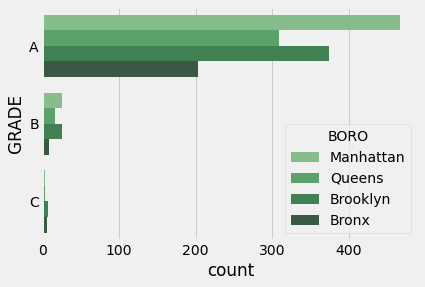

In [100]:
#Plot to show number of restaurants in each borough along with their grades
sns.countplot(y='GRADE',data=df_new,hue='BORO',palette='Greens_d')
plt.style.use("fivethirtyeight")

In [101]:
criticalgraph = df_new[["CRITICAL FLAG", "GRADE"]]

In [102]:
critnona = criticalgraph.dropna()

<AxesSubplot:title={'center':'All Boros'}, ylabel='GRADE'>

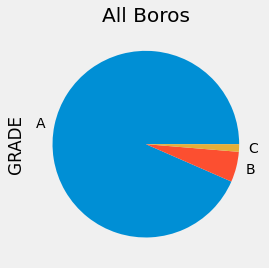

In [103]:
critnona["GRADE"].value_counts().plot(kind="pie", title = "All Boros")

In [104]:
per = critnona["GRADE"].value_counts()
per["per"] = critnona["GRADE"].value_counts()/(154922+32740+8261)
per

A      1352                                                                 
B      76                                                                   
C      19                                                                   
per    A    0.006901
B    0.000388
C    0.000097
Name: GRADE, dtype: float64
Name: GRADE, dtype: object

In [105]:
critnona["combined"] = critnona["CRITICAL FLAG"] + critnona["GRADE"]
criticalandgrade = critnona["combined"].value_counts()
dfcritgradeabc = criticalandgrade.iloc[[1,2,4]]
dfcritgradeabc = dfcritgradeabc.reset_index()
gradeseries = critnona["GRADE"].value_counts()
gradeseriesABC = gradeseries.head(3)
gradeseriesABC = gradeseriesABC.reset_index()
gradeseriesABC = gradeseriesABC.rename(columns={'index': 'Grade', 'GRADE': 'Number'})
dfcrit = pd.concat([dfcritgradeabc,gradeseriesABC], axis=1)
dfcrit["Percentage With Critical Violation"] = dfcrit["combined"]/dfcrit["Number"]
dfcrit = dfcrit.set_index("index")
dfcrit["Percentage With Critical Violation"]=dfcrit["Percentage With Critical Violation"] * 100
dfcrit["Percentage With Critical Violation"]

index
Not CriticalA      46.301775
CriticalB          68.421053
Not ApplicableA    89.473684
Name: Percentage With Critical Violation, dtype: float64

In [106]:
#It shows that 55% restaurants in with grade A are critical

Text(0, 0.5, 'Percentage Points')

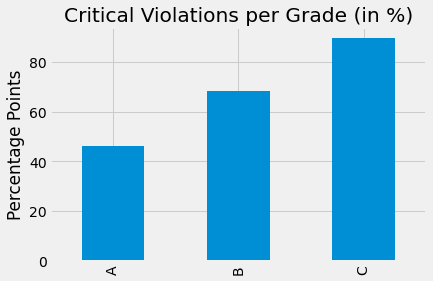

In [107]:
fig, ax = plt.subplots()
xlabels=['A','B','C']
dfcrit["Percentage With Critical Violation"].plot(ax=ax,kind="bar", title = "Critical Violations per Grade (in %)")
ax.set_xticklabels(xlabels)
ax.set_xlabel("")
ax.set_ylabel("Percentage Points")



Text(0, 0.5, '')

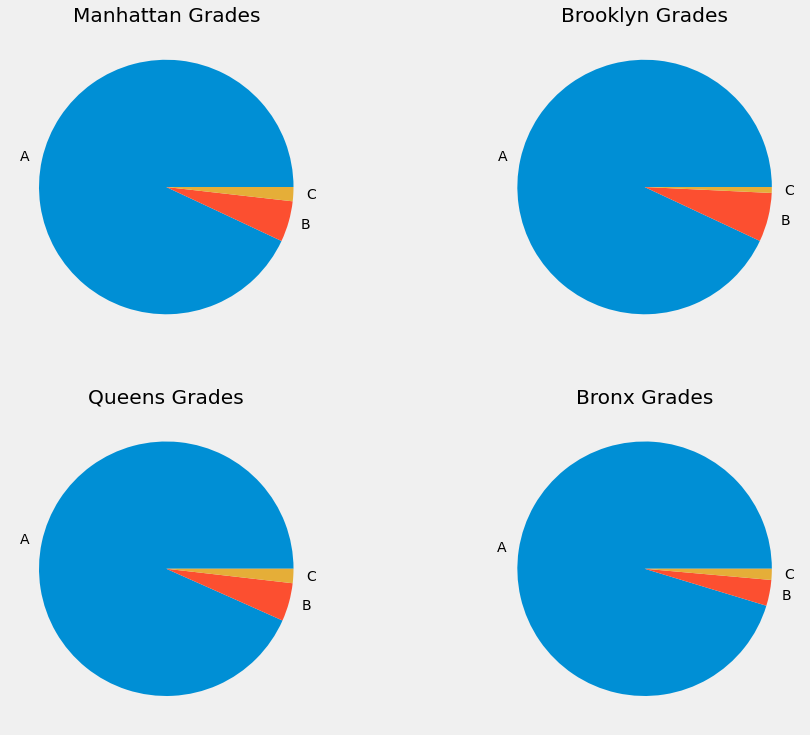

In [108]:
borograph = df_new[["BORO", "GRADE"]]
borograph = borograph.dropna()
borograph["Boro Grades"] = borograph["BORO"] + borograph["GRADE"]
combinedboro = borograph["Boro Grades"].value_counts()
manhattangrades = combinedboro.iloc[[0,4,7]]
brooklyngrades = combinedboro.iloc[[1,5,10]]
queensgrades = combinedboro.iloc[[2,6,9]]
bronxgrades = combinedboro.iloc[[3,8,11]]
fig, ax = plt.subplots(2,2, figsize=(14,12))
queensgrades.plot(ax=ax[1,0],kind='pie',title='Queens Grades', labels = ["A","B","C"])
brooklyngrades.plot(ax=ax[0,1],kind="pie", title="Brooklyn Grades",labels = ["A","B","C"])
manhattangrades.plot(ax=ax[0,0],kind="pie",title="Manhattan Grades",labels = ["A","B","C"])
bronxgrades.plot(ax=ax[1,1],kind="pie",title="Bronx Grades",labels = ["A","B","C"])
ax[0,0].set_ylabel("")
ax[1,0].set_ylabel("")
ax[0,1].set_ylabel("")
ax[1,1].set_ylabel("")

No handles with labels found to put in legend.


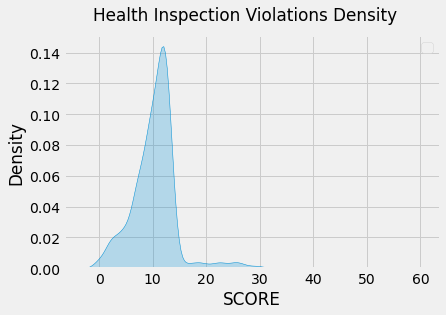

In [88]:
fig, ax = plt.subplots()

sns.kdeplot(df_new["SCORE"], shade=True, ax=ax)
ax.legend()

fig.suptitle("Health Inspection Violations Density")

plt.show()

No handles with labels found to put in legend.


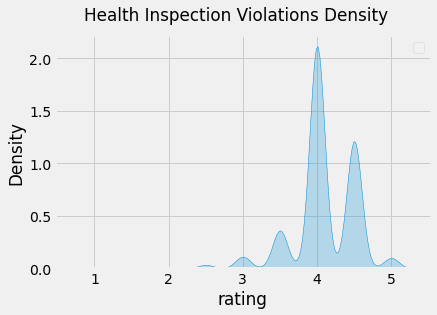

In [278]:
fig, ax = plt.subplots()

sns.kdeplot(df_new["rating"], shade=True, ax=ax)
ax.legend()

fig.suptitle("Health Inspection Violations Density")

plt.show()

In [280]:
scoregraph = df_new[["SCORE", "GRADE"]]
scoregraph = scoregraph.dropna()
scoregraph = scoregraph[scoregraph.GRADE != 'Z']
scoregraph = scoregraph[scoregraph.GRADE != 'P']
scoregraph = scoregraph[scoregraph.GRADE != 'Not Yet Graded']
scoregraph = scoregraph.reset_index()
ListOfGrades = []

In [281]:
#We are converting gradeA into 1, gradeB into 2, gradeC into 3 to convert to perform quanititative data manipulation
for item in scoregraph["GRADE"]:
    if item == "A":
        ListOfGrades.append(1)
    if item == "B":
        ListOfGrades.append(2)
    if item == "C":
        ListOfGrades.append(3)
    if item == "NaN":
        ListOfGrades.append(5)
scoregraph["GradeIndex"] = pd.Series(ListOfGrades)

Text(0, 0.5, 'Health Inspection Violations Given Grade')

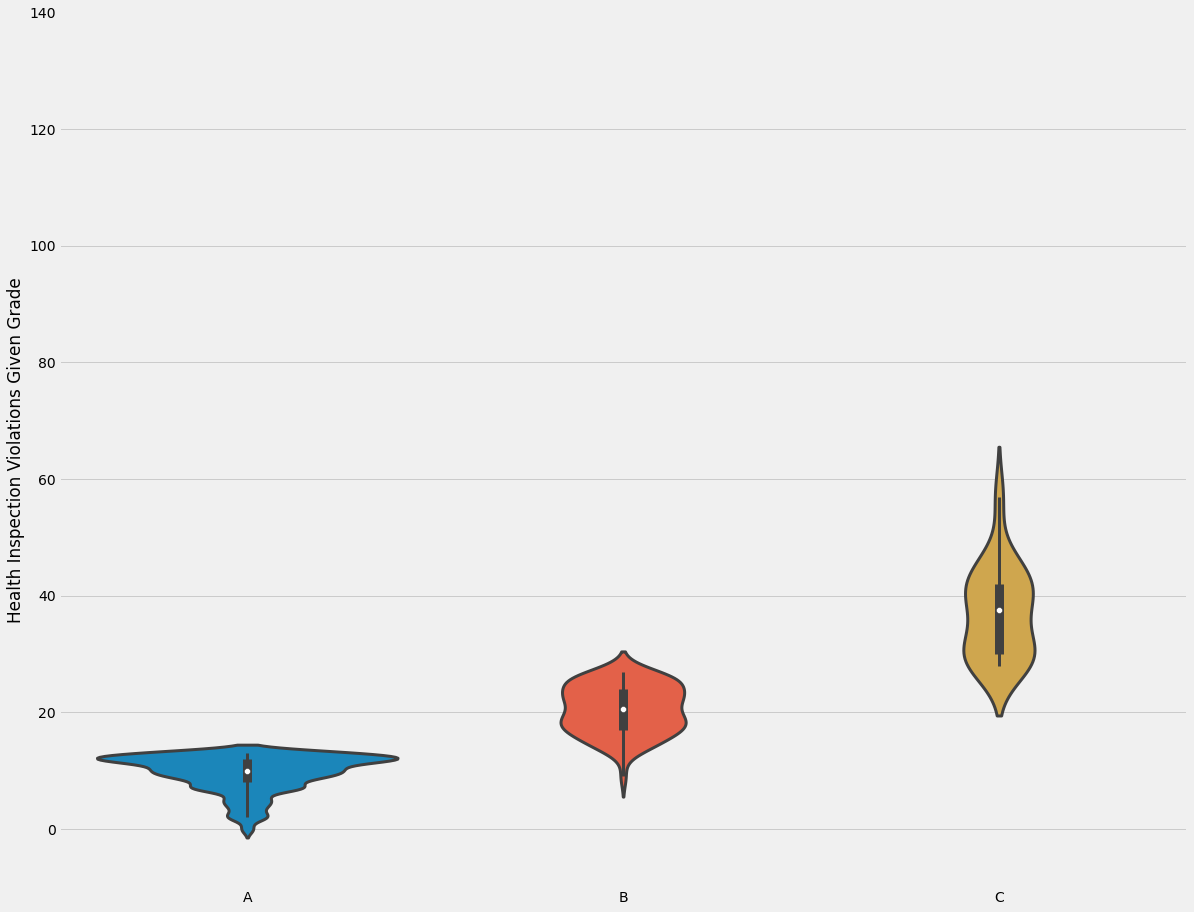

In [283]:
fig, ax = plt.subplots(figsize=(18,15))
sns.violinplot(x="GradeIndex", y="SCORE", data=scoregraph, linewidth = 3)
ax.set_xticklabels(xlabels)
ax.set_ylim(-10,140)
ax.set_xlabel("")
ax.set_ylabel("Health Inspection Violations Given Grade")
